In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
## READ
df = pd.read_csv('./data/Registry_Data.csv',index_col='ID')
df.head()

,Sex,Age,Weight,Height,BMI,T2D,HTN,Area,Precondition
ID,,,,,,,,,
1,M,62,65.0,158.0,26.037494,0,1,Kolfe W03,NaN
2,F,60,90.0,169.0,31.511502,1,1,Kolfe W03,NaN
3,F,70,60.0,151.0,26.314635,0,1,Kolfe W03,NaN
4,M,79,79.0,170.0,27.335640,0,1,Kolfe W03,NaN
5,F,48,60.0,148.0,27.392257,0,1,Kolfe W03,NaN


In [67]:
#Initial number of entries
df.shape

(4019, 9)

In [68]:
df.head()

,Sex,Age,Weight,Height,BMI,T2D,HTN,Area,Precondition
ID,,,,,,,,,
1,M,62,65.0,158.0,26.037494,0,1,Kolfe W03,NaN
2,F,60,90.0,169.0,31.511502,1,1,Kolfe W03,NaN
3,F,70,60.0,151.0,26.314635,0,1,Kolfe W03,NaN
4,M,79,79.0,170.0,27.335640,0,1,Kolfe W03,NaN
5,F,48,60.0,148.0,27.392257,0,1,Kolfe W03,NaN


In [69]:
## QUALITY CONTROL ##
# Find duplicates
any(df.duplicated())

True

In [70]:
# Find the duplicates
df[df.duplicated(keep=False)]

,Sex,Age,Weight,Height,BMI,T2D,HTN,Area,Precondition
ID,,,,,,,,,
95,M,65,55.0,153.0,23.495237,0,1,Kolfe W03,NaN
97,F,40,60.0,149.0,27.025810,0,1,Kolfe W03,NaN
205,F,46,65.0,158.0,26.037494,1,0,Kolfe W03,NaN
254,F,40,60.0,149.0,27.025810,0,1,Kolfe W03,NaN
341,F,30,51.0,160.0,19.921875,0,1,Kolfe W03,NaN
...,...,...,...,...,...,...,...,...,...
3987,F,70,54.0,152.0,23.372576,0,1,Gulele W09,NaN
3988,M,62,55.0,160.0,21.484375,0,1,Gulele W09,NaN
3989,M,53,70.0,177.0,22.343516,0,1,Gulele W09,NaN


In [71]:
# Drop the duplicates
df=df.drop_duplicates()
df.shape

(3840, 9)

In [72]:
# Check the BMI is correct--Can be erased

df['BMI2']=df['Weight']/(df['Height']/100)**2
any(df['BMI']!=df['BMI2'])

True

In [73]:
df['BMI']=df['BMI2']
df=df.drop(columns=['BMI2'])
df.shape

(3840, 9)

In [74]:
# Sort to see the extremes to see anomalies
df.sort_values(by='Age', ascending=False)

,Sex,Age,Weight,Height,BMI,T2D,HTN,Area,Precondition
ID,,,,,,,,,
2693,M,98,75.0,174.0,24.772097,0,1,Lideta W10,NaN
3051,M,98,69.0,155.0,28.720083,1,0,Arada W04,NaN
691,F,91,45.0,141.0,22.634676,0,1,Kirkos W11,NaN
3434,F,90,39.0,160.0,15.234375,0,1,Arada W04,NaN
3241,F,90,60.0,143.0,29.341288,0,1,Bole W12,NaN
...,...,...,...,...,...,...,...,...,...
143,F,22,60.0,158.0,24.034610,0,1,Kolfe W03,NaN
2875,F,22,43.0,155.0,17.898023,0,1,Laphto W02,NaN
2057,M,22,56.0,172.0,18.929151,0,1,Kolfe W08,NaN


In [75]:
df.dtypes

Sex              object
Age               int64
Weight          float64
Height          float64
BMI             float64
T2D               int64
HTN               int64
Area             object
Precondition     object
dtype: object

In [76]:
# Check for anomalies using z-score. https://en.wikipedia.org/wiki/Standard_score

from scipy import stats
df_clean=df
columns=['Age','Weight','Height','BMI']
anomalies_list=[]
for column in columns:
    #if(df[column].dtype == ('float64' or 'int64')):
        z = np.abs(stats.zscore(df[column]))
        threshold = 3
        anomalies=(np.where(z > threshold))
        print(column,df.index[anomalies])
        #df=df[~df.index.isin(anomalies)] 
        df.drop(df.index[anomalies],axis=0, inplace=True)

print(df.shape)

#Export clean dataset:
df.to_csv('./data/Registry_Data_clean.csv')

Age Int64Index([2693, 3051, 3427, 3615], dtype='int64', name='ID')
Weight Int64Index([ 212,  252,  336,  420,  588,  867,  993, 1143, 1305, 1352, 1542,
            1711, 2485, 2634, 2753, 2989, 3147, 3385, 3929],
           dtype='int64', name='ID')
Height Int64Index([94, 2850, 3062, 3619, 3623, 3636], dtype='int64', name='ID')
BMI Int64Index([  15,  134,  294,  314,  316,  454,  468,  480,  783, 1813, 1830,
            2105, 2194, 2275, 2385, 2713, 2937, 3145, 3148, 3202, 3213, 3249,
            3402, 3616, 3888, 3935],
           dtype='int64', name='ID')
(3785, 9)


In [77]:
### Statistical description of the dataset ###
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3785.0,54.832232,12.410871,22.000000,45.000000,55.000000,64.000000,91.000000
Weight,3785.0,67.629638,12.092480,32.000000,60.000000,67.000000,75.000000,105.000000
Height,3785.0,161.331044,8.955199,135.000000,155.000000,161.000000,168.000000,188.000000
BMI,3785.0,25.996196,4.325084,13.488797,23.030045,25.559414,28.650138,39.526714
T2D,3785.0,0.407662,0.491465,0.000000,0.000000,0.000000,1.000000,1.000000
HTN,3785.0,0.738177,0.439685,0.000000,0.000000,1.000000,1.000000,1.000000


In [78]:
df_HTN=df.loc[(df['T2D'] == 0 ) & (df['HTN'] == 1)].sample(n=300, random_state=1)
df_HTN.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,300.0,55.726667,13.195417,29.000000,45.000000,57.000000,65.000000,86.000000
Weight,300.0,67.488000,12.142200,40.000000,60.000000,67.000000,75.625000,103.000000
Height,300.0,160.619333,9.585250,136.000000,153.900000,160.000000,167.000000,185.000000
BMI,300.0,26.139665,4.102867,16.436555,23.300323,25.661718,28.794722,38.088643
T2D,300.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HTN,300.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df_T2D=df.loc[(df['T2D'] == 1 ) & (df['HTN'] == 0)].sample(n=300, random_state=1)
df_T2D.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,300.0,52.426667,11.444119,24.000000,43.0000,53.000000,60.000000,81.000000
Weight,300.0,66.986333,11.269091,35.000000,60.0000,66.000000,75.000000,95.600000
Height,300.0,161.710000,9.064387,140.000000,155.0000,161.500000,168.000000,185.000000
BMI,300.0,25.630999,3.965423,14.757969,22.8522,25.344353,28.231881,36.649821
T2D,300.0,1.000000,0.000000,1.000000,1.0000,1.000000,1.000000,1.000000
HTN,300.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000


In [80]:
df_HTN_T2D=df.loc[(df['T2D'] == 1 ) & (df['HTN'] == 1)].sample(n=300, random_state=1)
df_HTN_T2D.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,300.0,58.446667,10.977957,28.000,51.000000,60.000000,65.000000,90.000000
Weight,300.0,69.555267,11.133836,40.000,61.000000,69.000000,76.150000,100.000000
Height,300.0,162.104333,8.742799,140.000,155.000000,162.000000,168.250000,185.000000
BMI,300.0,26.534631,4.203987,15.625,23.767231,25.951557,29.136316,38.805698
T2D,300.0,1.000000,0.000000,1.000,1.000000,1.000000,1.000000,1.000000
HTN,300.0,1.000000,0.000000,1.000,1.000000,1.000000,1.000000,1.000000


In [81]:
#Student T-test
from scipy.stats import ttest_ind
print('Age---->',ttest_ind(df_HTN['Age'],df_T2D['Age']))
print('Weight---->',ttest_ind(df_HTN['Weight'],df_T2D['Weight']))
print('Height---->',ttest_ind(df_HTN['Height'],df_T2D['Height']))
print('BMI---->',ttest_ind(df_HTN['BMI'],df_T2D['BMI']))

Age----> Ttest_indResult(statistic=3.2723730736476173, pvalue=0.0011279328270133208)
Weight----> Ttest_indResult(statistic=0.5245219617523645, pvalue=0.6001099224645761)
Height----> Ttest_indResult(statistic=-1.4319503907930504, pvalue=0.15268047792353498)
BMI----> Ttest_indResult(statistic=1.5440592897504115, pvalue=0.12310297236019072)


In [82]:
###Kolmogorov-Smirnov Test
from scipy.stats import ks_2samp
print('Age---->',ks_2samp(df_HTN['Age'],df_T2D['Age']))
print('Weight---->',ks_2samp(df_HTN['Weight'],df_T2D['Weight']))
print('Height---->',ks_2samp(df_HTN['Height'],df_T2D['Height']))
print('BMI---->',ks_2samp(df_HTN['BMI'],df_T2D['BMI']))

Age----> KstestResult(statistic=0.18333333333333332, pvalue=8.024952455325493e-05)
Weight----> KstestResult(statistic=0.05333333333333334, pvalue=0.7879453299387805)
Height----> KstestResult(statistic=0.08666666666666667, pvalue=0.21005749381264038)
BMI----> KstestResult(statistic=0.06, pvalue=0.65357468169842)


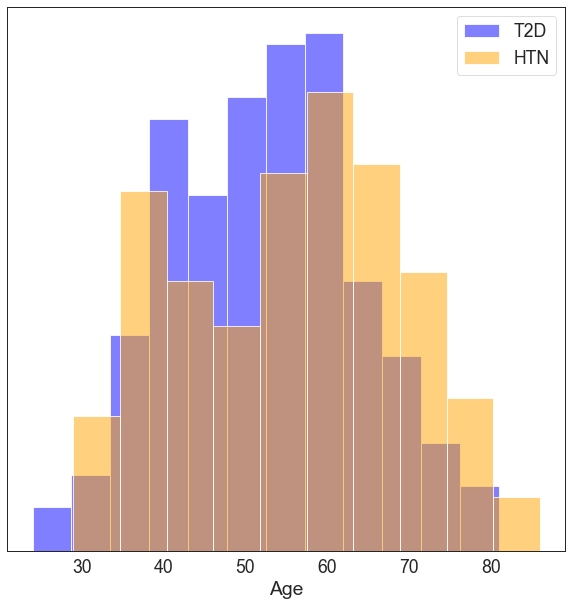

In [83]:
sns.set_context("paper", font_scale=2)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(10,10))
#sns.despine(left=True)
sns.set_palette('pastel')



B=['T2D','HTN']
column='Age'

N=int(max(df[column]))

sns.histplot(data=df_T2D[column],stat='density',color='blue',alpha=0.5,label=B[0])
sns.histplot(data=df_HTN[column],stat='density',color='orange',alpha=0.5,label=B[1])



ax.set_xlabel(column)
ax.get_yaxis().set_visible(False)
#ax.set_xlim(0,N+1)
ax.legend()
plt.show()


In [84]:
### PLOTS ####

# Change the type of the T2D and HTN columns to booleans

df['T2D']=df['T2D'].astype('bool')
df['HTN']=df['HTN'].astype('bool')

<Figure size 1200x800 with 0 Axes>

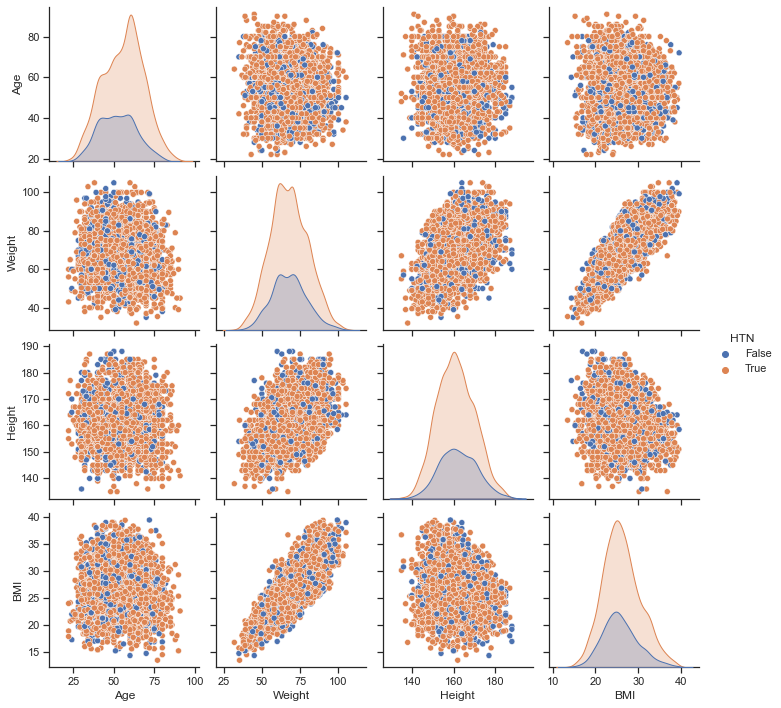

In [85]:
## This needs to be done for T2D
sns.set(style="ticks", color_codes=True)
plt.figure(dpi=200)
sns.pairplot(df.drop(columns=['T2D','Precondition','Area']), hue='HTN')
plt.show()

<Figure size 1200x800 with 0 Axes>

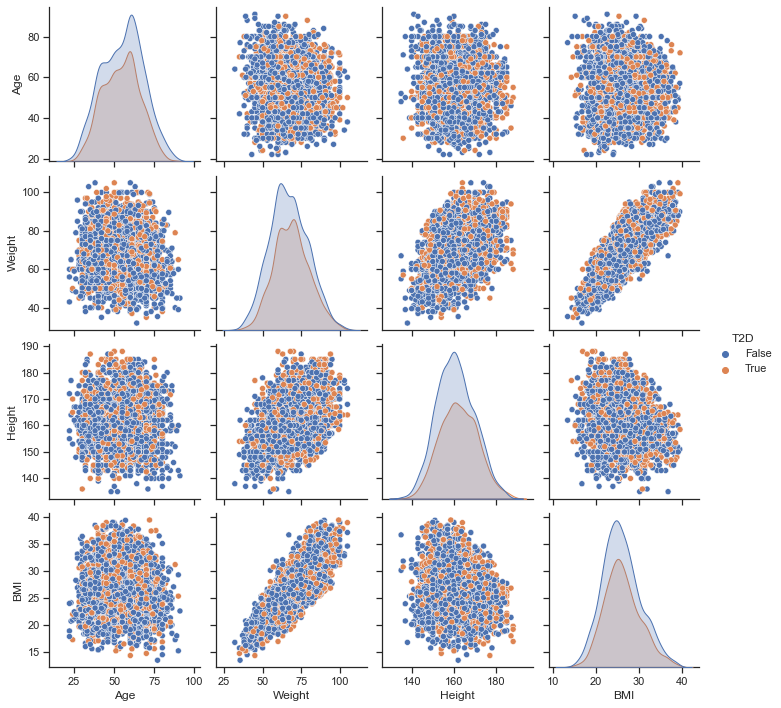

In [86]:
sns.set(style="ticks", color_codes=True)
plt.figure(dpi=200)
sns.pairplot(df.drop(columns=['HTN','Precondition','Area']), hue='T2D')
plt.show()

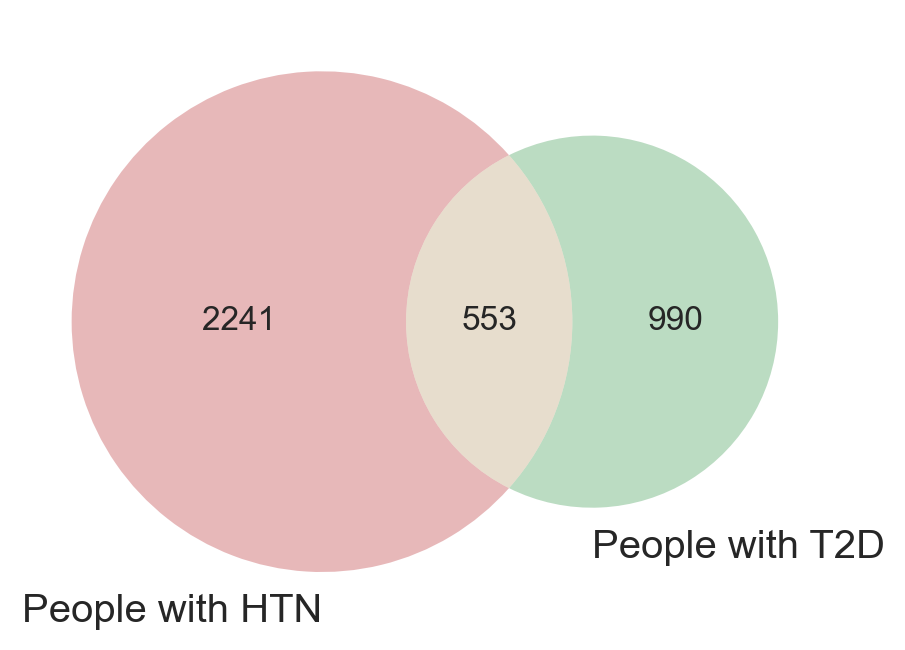

In [87]:
from matplotlib_venn import venn2

HTN_number = len(df.loc[(df['T2D'] == 0 ) & (df['HTN'] == 1)])
T2D_number = len(df.loc[(df['T2D'] == 1 ) & (df['HTN'] == 0)])
HTN_and_T2D_number = len(df.loc[(df['T2D'] == 1 ) & (df['HTN'] == 1)])
plt.figure(dpi=200)
venn2(subsets = (HTN_number, T2D_number, HTN_and_T2D_number), set_labels = ('People with HTN', 'People with T2D'))
plt.show()

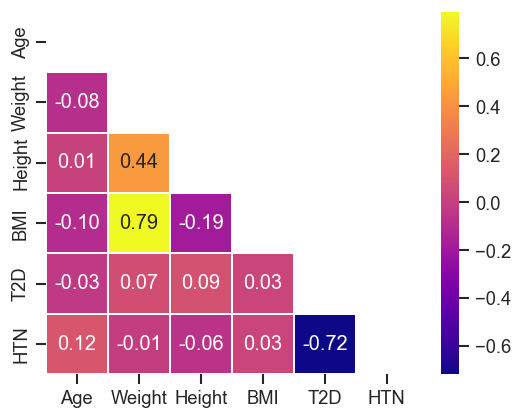

In [88]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 90)
plt.xticks(rotation = 0)
#plt.title('Correlation Heatmap')
plt.show()

In [89]:
########DATA MINING #####

In [90]:
with open('./data/abstract-type2diabe-set.txt', 'r') as f:
    data = f.read()
    abstracts = data.split('\n\n\n')
    abstracts = [line.strip() for line in abstracts]


In [91]:
import re

matches_list = []
for abstract in abstracts:


    # Regular expression pattern to search for
    patterns = ["\\d+ participant", "\\d+ subjects","\\d+ patients"]

    # add synonyms of "participant"

    patterns.append("\\d+ individuals")
    patterns.append("\\d+ volunteers")
    patterns.append("\\d+ enrollees")
    patterns.append("\\d+ cases")
    patterns.append("\\d+ samples")
    patterns.append("\\d+ specimens")
    patterns.append("\\d+ participants")
    patterns.append("\\d+ subjects")
    patterns.append("\\d+ patients")
    patterns.append("\\d+ persons")
    patterns.append("\\d+ people")

    
    # Search for pattern in text
    for pattern in patterns:
        matches = re.findall(pattern, abstract)
        if matches:
            matches_list.extend(matches)



# Remove character with a regular expression pattern to extract only the digits
chars = "\\d+"

# List comprehension to extract only the digits from each string in matches_list
matches_list = [re.findall(chars, match)[0] for match in matches_list]


# Remove duplicates
matches_list = list(set(matches_list))

# Convert to integers
macthes_list = [int(x) for x in matches_list]

print(max(macthes_list))

879
